 ## A/B test -  Analysis
 As an analyst at a big online store ,  a list of hypotheses that may help boost revenue has been compiled  
 together with the marketing department .We need to prioritize these hypotheses, launch an A/B test,  
 and analyze the results.


### Steps:
1.Prioritizing Hypotheses  
2.A/B test analysis

In [76]:
#Import all the necessary packages
import pandas as pd
from matplotlib import pyplot  as plt
import numpy as np
from scipy import stats  as st
import datetime as dt
import sys

In [77]:
#Hypothesis dataset
hypothesis_df = pd.read_csv('hypothesis_us.csv')

In [78]:
#orders dataset
orders_df=pd.read_csv('orders_us.csv')

In [79]:
#visits dataset
visits_df=pd.read_csv('visits_us.csv')

In [80]:
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9 non-null      int64 
 1   Hypothesis  9 non-null      object
 2   Reach       9 non-null      int64 
 3   Impact      9 non-null      int64 
 4   Confidence  9 non-null      int64 
 5   Effort      9 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 560.0+ bytes


***Data Preprocessing***

In [81]:
#renaming columns for uniformity
hypothesis_df=hypothesis_df.rename(columns={'Hypothesis':'hypothesis',
                                             'Reach':'reach',
                                             'Impact':'impact',
                                             'Confidence':'confidence',
                                             'Effort':'effort'})

In [82]:
hypothesis_df.iloc[0]


Unnamed: 0                                                                              0
hypothesis    Add two new channels for attracting traffic. This will bring 30% more users
reach                                                                                   3
impact                                                                                 10
confidence                                                                              8
effort                                                                                  6
Name: 0, dtype: object

In [83]:
pd.options.display.max_colwidth

200

In [84]:
pd.options.display.max_colwidth=200

In [85]:
hypothesis_df

,Unnamed: 0,hypothesis,reach,impact,confidence,effort
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [86]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1197 non-null   int64  
 1   transactionId  1197 non-null   int64  
 2   visitorId      1197 non-null   int64  
 3   date           1197 non-null   object 
 4   revenue        1197 non-null   float64
 5   group          1197 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 56.2+ KB


We see from info that there is no missing values in orders_df.

In [87]:
orders_df.head(10)

,Unnamed: 0,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
5,5,182168103,935554773,2019-08-15,35.0,B
6,6,398296753,2900797465,2019-08-15,30.6,B
7,7,2626614568,78758296,2019-08-15,20.1,A
8,8,1576988021,295230930,2019-08-15,215.9,A
9,9,1506739906,1882260405,2019-08-15,30.5,B


In [88]:
#group is typed to category
orders_df['group']=orders_df['group'].astype('category')

In [89]:
#date is typed to datetime
orders_df['date'] = orders_df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [90]:
orders_df.head(10)

,Unnamed: 0,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
5,5,182168103,935554773,2019-08-15,35.0,B
6,6,398296753,2900797465,2019-08-15,30.6,B
7,7,2626614568,78758296,2019-08-15,20.1,A
8,8,1576988021,295230930,2019-08-15,215.9,A
9,9,1506739906,1882260405,2019-08-15,30.5,B


In [91]:
#check for duplicates
orders_df.duplicated().sum()

0

In [92]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62 non-null     int64 
 1   date        62 non-null     object
 2   group       62 non-null     object
 3   visits      62 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ KB


We see from info that there is no missing values in visits_df.

In [93]:
visits_df

,Unnamed: 0,date,group,visits
0,0,2019-08-01,A,719
1,1,2019-08-02,A,619
2,2,2019-08-03,A,507
3,3,2019-08-04,A,717
4,4,2019-08-05,A,756
...,...,...,...,...
57,57,2019-08-27,B,720
58,58,2019-08-28,B,654
59,59,2019-08-29,B,531
60,60,2019-08-30,B,490


In [94]:
#group expressed as category
visits_df['group']=visits_df['group'].astype('category')

In [95]:
#date expressed as datetime
visits_df['date'] = visits_df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [96]:
visits_df

,Unnamed: 0,date,group,visits
0,0,2019-08-01,A,719
1,1,2019-08-02,A,619
2,2,2019-08-03,A,507
3,3,2019-08-04,A,717
4,4,2019-08-05,A,756
...,...,...,...,...
57,57,2019-08-27,B,720
58,58,2019-08-28,B,654
59,59,2019-08-29,B,531
60,60,2019-08-30,B,490


In [97]:
#check for duplicates
visits_df.duplicated().sum()

0

In [98]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  62 non-null     int64         
 1   date        62 non-null     datetime64[ns]
 2   group       62 non-null     category      
 3   visits      62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 1.8 KB


In [99]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     1197 non-null   int64         
 1   transactionId  1197 non-null   int64         
 2   visitorId      1197 non-null   int64         
 3   date           1197 non-null   datetime64[ns]
 4   revenue        1197 non-null   float64       
 5   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 48.2 KB


***There are visitors who belong to both the groups .We need to find those users and delete them.***

In [100]:
##list of users with number of groups
group_counts = orders_df.groupby('visitorId').agg({'group': 'nunique'}).reset_index() 


In [101]:
group_counts

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [102]:
#filtering users belonging to only one  group
to_include = group_counts[group_counts['group'] == 1]

In [103]:
to_include

,visitorId,group
0,5114589,1
1,6958315,1
3,11685486,1
4,39475350,1
5,47206413,1
...,...,...
1025,4259830713,1
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [104]:
#merge it with orders
orders_df_valid=orders_df.merge(to_include['visitorId'],on='visitorId',how='inner')

In [105]:
orders_df_valid.sort_values(by='visitorId')

,Unnamed: 0,transactionId,visitorId,date,revenue,group
48,56,900025958,5114589,2019-08-16,10.8,B
505,573,1887336629,6958315,2019-08-04,25.9,B
207,233,797272237,11685486,2019-08-23,100.4,A
786,912,437876380,39475350,2019-08-08,65.4,B
794,924,3778001764,47206413,2019-08-10,15.2,B
...,...,...,...,...,...,...
898,1047,1266191879,4259830713,2019-08-11,50.1,A
761,886,51443164,4278982564,2019-08-05,385.7,A
509,576,2724331495,4279090005,2019-08-04,105.3,B
347,392,3796325351,4281247801,2019-08-25,45.6,B


In [106]:
orders_df_valid.nunique()

Unnamed: 0       1016
transactionId    1016
visitorId         973
date               31
revenue           359
group               2
dtype: int64

#### Prioritizing Hypotheses

***Apply ICE framework***

In [107]:
hypothesis_df

,Unnamed: 0,hypothesis,reach,impact,confidence,effort
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [108]:
hypothesis_df['ICE'] = (hypothesis_df['impact'] *hypothesis_df['confidence'])/hypothesis_df['effort']

In [109]:
hypothesis_df=hypothesis_df.sort_values(by='ICE',ascending=False)

In [110]:
hypothesis_df

,Unnamed: 0,hypothesis,reach,impact,confidence,effort,ICE
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


***Apply RICE framework***


In [111]:
hypothesis_df['RICE'] = (hypothesis_df['reach']*hypothesis_df['impact'] *hypothesis_df['confidence'])/hypothesis_df['effort']
hypothesis_df

,Unnamed: 0,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


In [112]:
hypothesis_df=hypothesis_df.sort_values(by='RICE',ascending=False)

In [113]:
hypothesis_df

,Unnamed: 0,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


***Conclusion***  
Hypothesis 8,0,7 were on the top 3 priorities with respect to ICE score . But once  
we add Reach parameter ,hypothesis 7 moved from 3rd to 1st position because of its  
higher Reach score which is 10.Also its impact is also on the higher side.

#### A/B test analysis:

In [114]:
orders_df_valid

,Unnamed: 0,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,255.7,B
1012,1192,2662137336,3733762160,2019-08-14,100.8,B
1013,1193,2203539145,370388673,2019-08-14,50.1,A
1014,1194,1807773912,573423106,2019-08-14,165.3,A


In [115]:
#group a --  getting aggregated cumulative daily data on orders for group A
orders_df_valid_cumsumrev_a = orders_df_valid[orders_df_valid['group']=='A']
orders_df_valid_cumsumrev_a = orders_df_valid_cumsumrev_a[['date','group','revenue','transactionId']].groupby(['date']).agg({'revenue':'sum','transactionId':'nunique'}).reset_index()
orders_df_valid_cumsumrev_a['revenue_cumsum'] = orders_df_valid_cumsumrev_a['revenue'].cumsum()

orders_df_valid_cumsumrev_a=orders_df_valid_cumsumrev_a.rename(columns={'transactionId':'orders'})
orders_df_valid_cumsumrev_a['orders_cumsum'] = orders_df_valid_cumsumrev_a['orders'].cumsum()
orders_df_valid_cumsumrev_a['average_order_cumsum'] = orders_df_valid_cumsumrev_a['revenue_cumsum']/orders_df_valid_cumsumrev_a['orders_cumsum']

In [116]:
#group b -- getting aggregated cumulative daily data on orders for group B
orders_df_valid_cumsumrev_b = orders_df_valid[orders_df_valid['group']=='B']
orders_df_valid_cumsumrev_b = orders_df_valid_cumsumrev_b[['date','revenue','transactionId']].groupby('date').agg({'revenue':'sum','transactionId':'nunique'}).reset_index()
orders_df_valid_cumsumrev_b['revenue_cumsum'] = orders_df_valid_cumsumrev_b['revenue'].cumsum()
orders_df_valid_cumsumrev_b=orders_df_valid_cumsumrev_b.rename(columns={'transactionId':'orders'})
orders_df_valid_cumsumrev_b['orders_cumsum'] = orders_df_valid_cumsumrev_b['orders'].cumsum()

orders_df_valid_cumsumrev_b['average_order_cumsum'] = orders_df_valid_cumsumrev_b['revenue_cumsum']/orders_df_valid_cumsumrev_b['orders_cumsum']
#getting aggregated cumulative daily data on visits for groups A and B
visits_df_a=visits_df[visits_df['group']=='A']
visits_df_b=visits_df[visits_df['group']=='B']
visits_df_a['visits_cumsum'] = visits_df_a['visits'].cumsum()
visits_df_b['visits_cumsum'] = visits_df_b['visits'].cumsum()
#merging cumulative orders and visits
cumulativeRevenueA=orders_df_valid_cumsumrev_a.merge(visits_df_a,left_on='date', right_on='date')
cumulativeRevenueB=orders_df_valid_cumsumrev_b.merge(visits_df_b,left_on='date', right_on='date')


C:\Users\thiya\AppData\Local\Temp/ipykernel_25948/1530130671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_df_a['visits_cumsum'] = visits_df_a['visits'].cumsum()
C:\Users\thiya\AppData\Local\Temp/ipykernel_25948/1530130671.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_df_b['visits_cumsum'] = visits_df_b['visits'].cumsum()


In [117]:
visits_df

,Unnamed: 0,date,group,visits
0,0,2019-08-01,A,719
1,1,2019-08-02,A,619
2,2,2019-08-03,A,507
3,3,2019-08-04,A,717
4,4,2019-08-05,A,756
...,...,...,...,...
57,57,2019-08-27,B,720
58,58,2019-08-28,B,654
59,59,2019-08-29,B,531
60,60,2019-08-30,B,490


In [118]:
orders_df_valid_cumsumrev_a.head(10)


,date,revenue,orders,revenue_cumsum,orders_cumsum,average_order_cumsum
0,2019-08-01,2266.6,23,2266.6,23,98.547826
1,2019-08-02,1468.3,19,3734.9,42,88.926190
2,2019-08-03,1815.2,24,5550.1,66,84.092424
3,2019-08-04,675.5,11,6225.6,77,80.851948
4,2019-08-05,1398.0,22,7623.6,99,77.006061
5,2019-08-06,668.4,15,8292.0,114,72.736842
6,2019-08-07,1942.0,16,10234.0,130,78.723077
7,2019-08-08,1404.8,14,11638.8,144,80.825000
8,2019-08-09,2095.2,11,13734.0,155,88.606452
9,2019-08-10,2387.5,15,16121.5,170,94.832353


In [119]:
cumulativeRevenueA.head(10)

,date,revenue,orders,revenue_cumsum,orders_cumsum,average_order_cumsum,Unnamed: 0,group,visits,visits_cumsum
0,2019-08-01,2266.6,23,2266.6,23,98.547826,0,A,719,719
1,2019-08-02,1468.3,19,3734.9,42,88.926190,1,A,619,1338
2,2019-08-03,1815.2,24,5550.1,66,84.092424,2,A,507,1845
3,2019-08-04,675.5,11,6225.6,77,80.851948,3,A,717,2562
4,2019-08-05,1398.0,22,7623.6,99,77.006061,4,A,756,3318
5,2019-08-06,668.4,15,8292.0,114,72.736842,5,A,667,3985
6,2019-08-07,1942.0,16,10234.0,130,78.723077,6,A,644,4629
7,2019-08-08,1404.8,14,11638.8,144,80.825000,7,A,610,5239
8,2019-08-09,2095.2,11,13734.0,155,88.606452,8,A,617,5856
9,2019-08-10,2387.5,15,16121.5,170,94.832353,9,A,406,6262


In [120]:
orders_df_valid_cumsumrev_b.head(10)

,date,revenue,orders,revenue_cumsum,orders_cumsum,average_order_cumsum
0,2019-08-01,967.2,17,967.2,17,56.894118
1,2019-08-02,2568.1,23,3535.3,40,88.382500
2,2019-08-03,1071.6,14,4606.9,54,85.312963
3,2019-08-04,1531.6,14,6138.5,68,90.272059
4,2019-08-05,1449.3,21,7587.8,89,85.256180
5,2019-08-06,3369.3,23,10957.1,112,97.831250
6,2019-08-07,3435.6,23,14392.7,135,106.612593
7,2019-08-08,2379.9,22,16772.6,157,106.831847
8,2019-08-09,1656.2,19,18428.8,176,104.709091
9,2019-08-10,1674.8,22,20103.6,198,101.533333


In [121]:
cumulativeRevenueB.sort_values(by='revenue_cumsum').head(10)

,date,revenue,orders,revenue_cumsum,orders_cumsum,average_order_cumsum,Unnamed: 0,group,visits,visits_cumsum
0,2019-08-01,967.2,17,967.2,17,56.894118,31,B,713,713
1,2019-08-02,2568.1,23,3535.3,40,88.382500,32,B,581,1294
2,2019-08-03,1071.6,14,4606.9,54,85.312963,33,B,509,1803
3,2019-08-04,1531.6,14,6138.5,68,90.272059,34,B,770,2573
4,2019-08-05,1449.3,21,7587.8,89,85.256180,35,B,707,3280
5,2019-08-06,3369.3,23,10957.1,112,97.831250,36,B,655,3935
6,2019-08-07,3435.6,23,14392.7,135,106.612593,37,B,709,4644
7,2019-08-08,2379.9,22,16772.6,157,106.831847,38,B,654,5298
8,2019-08-09,1656.2,19,18428.8,176,104.709091,39,B,610,5908
9,2019-08-10,1674.8,22,20103.6,198,101.533333,40,B,369,6277


In [122]:
cumulativeRevenueB['revenue_cumsum'].describe()

count       31.000000
mean     39235.251613
std      26695.051183
min        967.200000
25%      17600.700000
50%      32840.200000
75%      65435.650000
max      79651.200000
Name: revenue_cumsum, dtype: float64

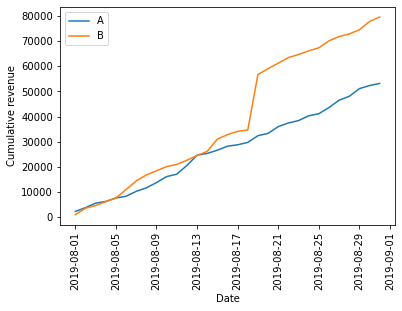

In [123]:
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue_cumsum'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue_cumsum'], label='B')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.show()

Both the group shows increase in revenue.Group A is increasing steadily with no major change.  
Group B shows a spike aand then is increasing steadily..  
Analysing the table 'cumulativeRevenueB' , we see that there is a spike in revenue on 2019-08-19  .
There is an consistent increase of revenue per day around(1000-3000) with a sudden spike of 22000  
on 2019-08-19 which then gets back to the trend around(1000-3000).this can be seen clearly in   
the above graph.  


***cumulative average order size by group***

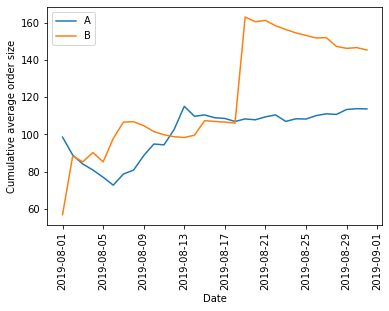

In [124]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['average_order_cumsum'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['average_order_cumsum'], label='B')
plt.legend() 
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cumulative average order size')
plt.show()



Consistent with our earlier finding , we see a spike in average order size (B)around 17th to 21st in the month.  
This is because of sudden spike in revenue but not in orders ...The graph then is much more stable with B falling slightly and A showing gradual increase.

***Relative difference in cumulative average order size for group B compared with group A***

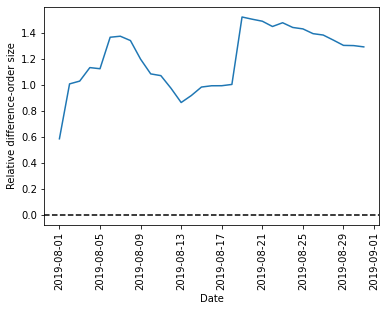

In [125]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['average_order_cumsumB'])/(mergedCumulativeRevenue['average_order_cumsumA']-1))
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Relative difference-order size')
plt.show()


The graph which shows some spikes and dips initially gets smoothened towards the end and looks more stable.

***daily conversion rates of the two groups***

In [126]:
# calculating cumulative conversion
cumulativeRevenueA['conversion'] = cumulativeRevenueA['orders_cumsum']/cumulativeRevenueA['visits_cumsum']

cumulativeRevenueB['conversion'] = cumulativeRevenueB['orders_cumsum']/cumulativeRevenueB['visits_cumsum']
cumulativeRevenueB.head(10)

,date,revenue,orders,revenue_cumsum,orders_cumsum,average_order_cumsum,Unnamed: 0,group,visits,visits_cumsum,conversion
0,2019-08-01,967.2,17,967.2,17,56.894118,31,B,713,713,0.023843
1,2019-08-02,2568.1,23,3535.3,40,88.382500,32,B,581,1294,0.030912
2,2019-08-03,1071.6,14,4606.9,54,85.312963,33,B,509,1803,0.029950
3,2019-08-04,1531.6,14,6138.5,68,90.272059,34,B,770,2573,0.026428
4,2019-08-05,1449.3,21,7587.8,89,85.256180,35,B,707,3280,0.027134
5,2019-08-06,3369.3,23,10957.1,112,97.831250,36,B,655,3935,0.028463
6,2019-08-07,3435.6,23,14392.7,135,106.612593,37,B,709,4644,0.029070
7,2019-08-08,2379.9,22,16772.6,157,106.831847,38,B,654,5298,0.029634
8,2019-08-09,1656.2,19,18428.8,176,104.709091,39,B,610,5908,0.029790
9,2019-08-10,1674.8,22,20103.6,198,101.533333,40,B,369,6277,0.031544


ConversionError: Failed to convert value(s) to axis units: '2019-08-01'

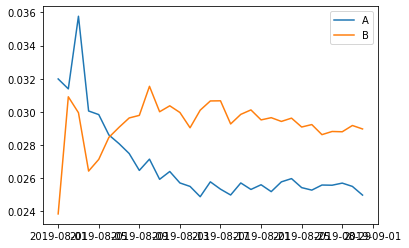

In [127]:
# plotting the graphs
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['conversion'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0, 0.08]) 
plt.xticks(rotation=90)
plt.show()

Group B has higher conversion compared to group A ie more users from Group B who visit the website ends up  
placing order ..Also conversion for both the groups are more stable ..

***Relative difference in cumulative conversion for group B compared with group A***

In [ ]:
mergedCumulativeConversions = cumulativeRevenueA[['date','conversion']].merge(cumulativeRevenueB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Relative difference - Cumulative conversion')
plt.show()

The above graph shows that group B has increasing conversion compared to group A and looks stabilised around   
0.1-0.2.  
Based on our above analysis ,Group B has higher cumulative conversion as well as the average order size ..


***scatter chart of the number of orders per user***

In [ ]:
#number of orders placed by each user
ordersByUsers = (
    orders_df_valid.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
 

In [ ]:
plt.hist(ordersByUsers['orders']) 
plt.xlabel('number of orders')

The above histogram shows that most users place only 1 order.Users placing 2 and 3 orders are way less   
compared to users placing one order.

In [ ]:
ordersByUsers['orders'].describe()

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('number of orders')

We see that 2 and 3 orders are very few ..Lets look at the percentile values to verify it.

***95th and 99th percentiles for the number of orders per user***

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

We see that more than 95% of the orders placed are just a single order . 2 and 3 orders contribute to less than 5% of number of orders per user..

***scatter chart of order prices***

In [ ]:
#revenue from each user
orderpriceByUsers = (
    orders_df_valid.drop(['group', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'})
)

orderpriceByUsers.columns = ['userId', 'order_price']

print(orderpriceByUsers.sort_values(by='order_price', ascending=False).head(10))
 

In [ ]:
orderpriceByUsers['order_price'].describe()

In [ ]:
plt.hist(orderpriceByUsers['order_price']) 
plt.xlabel('order prices')

In [ ]:
x_values = pd.Series(range(0,len(orderpriceByUsers)))

plt.scatter(x_values, orderpriceByUsers['order_price']) 
plt.ylabel('order price')

There is just only one order around 20000 and one near 2000.Most of the orders are around 100-200..  

***95th and 99th percentiles of order prices***

In [ ]:
print(np.percentile(orderpriceByUsers['order_price'], [95, 99])) 

Only 5% of orders more than 450 and just 1% more than 912 based on the above percentile calculation.

***statistical significance of the difference in conversion between the groups using the raw data***

In [ ]:
orders_df_valid.head(10)

In [ ]:
visits_df.head(10)

In [ ]:
ordersByUsersA = orders_df_valid[orders_df_valid['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_df_valid[orders_df_valid['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [ ]:
#sampleA stores a sample where each element is the number of orders made by a certain user,  
#including zeroes. So the number of sampleA elements is the number of users, and the sum of all   
#the elements is the number of orders. To get the group's conversion rate, we'll need to divide the  
#sum of the orders by the number of users. Using the mean() method, we'll find the mean for sampleA. 
#We'll find the conversion rate for group B in a similar way: sampleB.mean().

# visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders']) gives number of users who didnt place any order
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
# round the value to three decimal places. 
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

Conclusion:p-value, 0.006 is less than 0.05 which means we can reject the null hypothesis (There  
is no significant difference between groups).So ,based on the raw data, there is significant difference between groups A and B in conversion.


***statistical significance of the difference in average order size between the groups using the raw data.***

In [ ]:
#pass the data on revenue to the mannwhitneyu() criterion. 
print('{0:.3f}'.format(st.mannwhitneyu(orders_df_valid[orders_df_valid['group']=='A']['revenue'], orders_df_valid[orders_df_valid['group']=='B']['revenue'])[1]))
#find the relative difference in average order size between the groups:
print('{0:.3f}'.format(orders_df_valid[orders_df_valid['group']=='B']['revenue'].mean()/orders_df_valid[orders_df_valid['group']=='A']['revenue'].mean()-1)) 

The p-value(0.431) is considerably higher than 0.05, so we do not reject the null hypothesis and conclude that  the groups do not differ in average order size with raw data.   


***statistical significance of the difference in conversion between the groups using the filtered data.***

In [ ]:
#Based on the previous percentile calculation , we filter datas with more than 1 order  and revenue more than 500 as abnormal and remove them.
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_df_valid[orders_df_valid['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

There are 72 users contributing to anamoly in our analysis.  
We create 2 filtered datasets without these and test for statistical significance..

In [ ]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [ ]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

The p-value is  less than 0.05 showing there is statistical difference in conversion between the groups with  
filtered data.  
Also there's no big change from that of raw data.

The results for conversion almost didn't change. Let's see what happens to the values for average order size:

In [ ]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders_df_valid[np.logical_and(
         orders_df_valid['group']=='A',
        np.logical_not( orders_df_valid['visitorId'].isin(abnormalUsers)))]['revenue'],
     orders_df_valid[np.logical_and(
         orders_df_valid['group']=='B',
        np.logical_not( orders_df_valid['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
     orders_df_valid[np.logical_and(orders_df_valid['group']=='B',np.logical_not( orders_df_valid['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
     orders_df_valid[np.logical_and(
        orders_df_valid['group']=='A',
        np.logical_not( orders_df_valid['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 



The p-value has not changed much with  filtered data in average order size.This concludes that there is  
no difference in average order size between the groups.The relative difference     
between the groups which was 27% is down to 1%.

### Conclusion:  
1.Both raw and filtered data revealed  statistically significant differences in conversion between the groups.  
2.Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.  
3.Based on the graph showing difference in conversion and average order size ,group B seems to be in   
higher side  and also the graph is more steady..

As we see statistically significant differences between both the groups with group B scoring higher  
in metrics ,it is better to stop testing calling it a success.